In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Define directories
DATA_DIR = Path('/home/abdellah-ennajari/Desktop/AI-Powered-Academic-Research-Assistant')
PROCESSED_DIR = DATA_DIR / 'Data/processed'

In [4]:
# Load cleaned data
papers_df = pd.read_csv(PROCESSED_DIR / 'cleaned_papers.csv')

In [5]:
# Print dataset statistics
print("\nDataset Statistics:")
print(f"Number of papers: {len(papers_df)}")



Dataset Statistics:
Number of papers: 535914


In [6]:
# Show sample data
print("\nSample Papers Data:")
print(papers_df.head())

# Summary statistics
print("\nPapers DataFrame Info:")
print(papers_df.info())

print("\nPapers DataFrame Description:")
print(papers_df.describe())


Sample Papers Data:
     paper_id                                              title  \
0  2404.00001  Uso de herramientas digitales matem\'aticas en...   
1  2404.00006  A Critique of Chen's "The 2-MAXSAT Problem Can...   
2  2404.00007  A Comprehensive Tutorial on over 100 Years of ...   
3  2404.00009  Applying Cognitive Diagnostic Models to Mechan...   
4  2404.00012  Stress index strategy enhanced with financial ...   

   title_length  word_count  contains_ml    year  
0            72           9            0  2404.0  
1            76          13            0  2404.0  
2           119          16            0  2404.0  
3            69           8            0  2404.0  
4            92          13            0  2404.0  

Papers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535914 entries, 0 to 535913
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   paper_id      535914 non-null  object

# ====================================================
# Exploratory Data Analysis (EDA)
# ====================================================

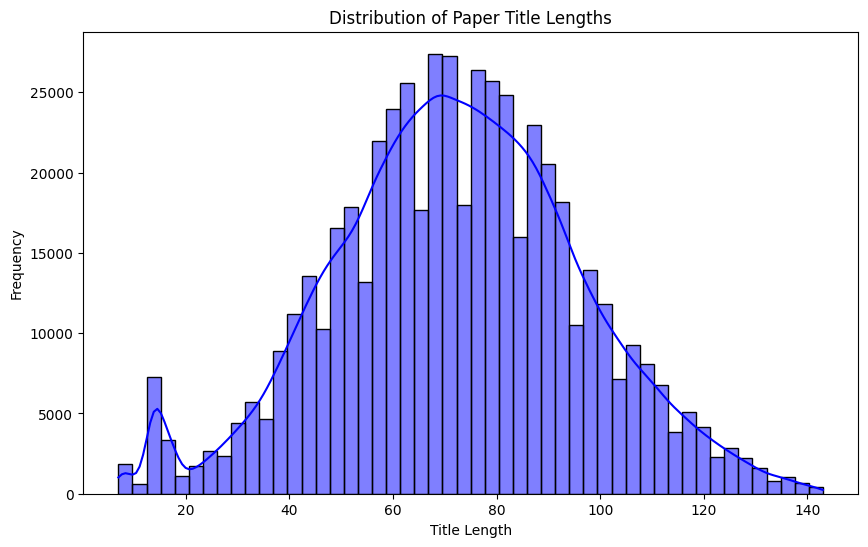

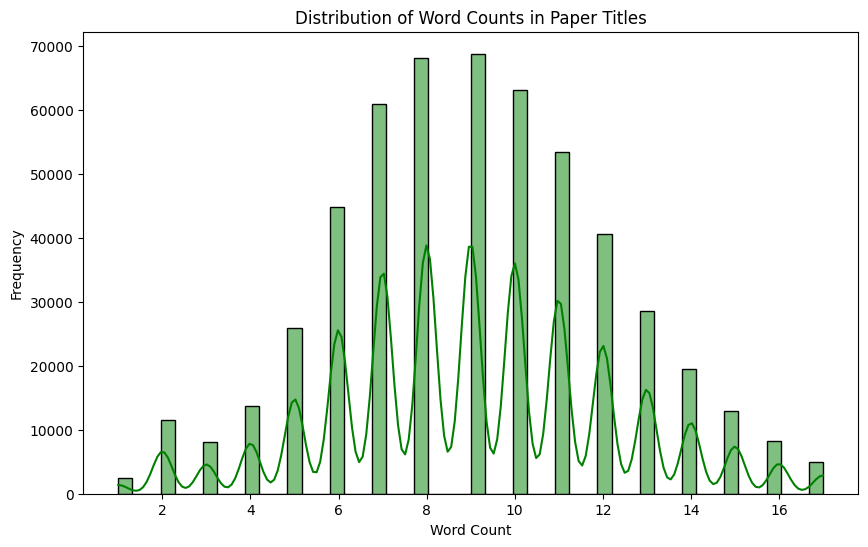

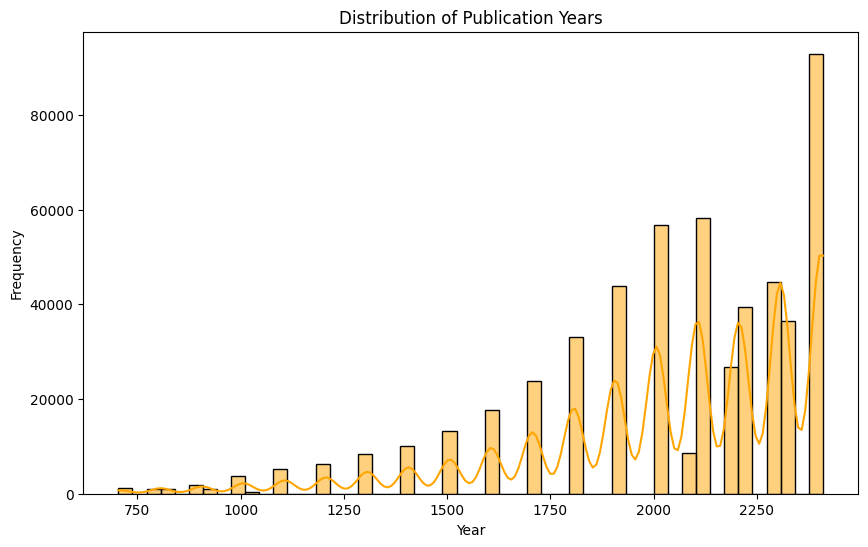

In [7]:
# 1. Distribution of Paper Titles Length
plt.figure(figsize=(10, 6))
sns.histplot(papers_df['title_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Paper Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Word Counts
plt.figure(figsize=(10, 6))
sns.histplot(papers_df['word_count'], bins=50, kde=True, color='green')
plt.title('Distribution of Word Counts in Paper Titles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Years
plt.figure(figsize=(10, 6))
sns.histplot(papers_df['year'], bins=50, kde=True, color='orange')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [8]:
# 4. Top 10 Most Common Words in Paper Titles
from collections import Counter
import re

In [9]:
# Extract words from titles
words = []
for title in papers_df['title']:
    words.extend(re.findall(r'\b\w+\b', title.lower()))


In [10]:
# Count word frequencies
word_counts = Counter(words)
top_words = word_counts.most_common(10)

/tmp/ipykernel_42655/3839539756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in top_words], y=[word for word, count in top_words], palette='viridis')


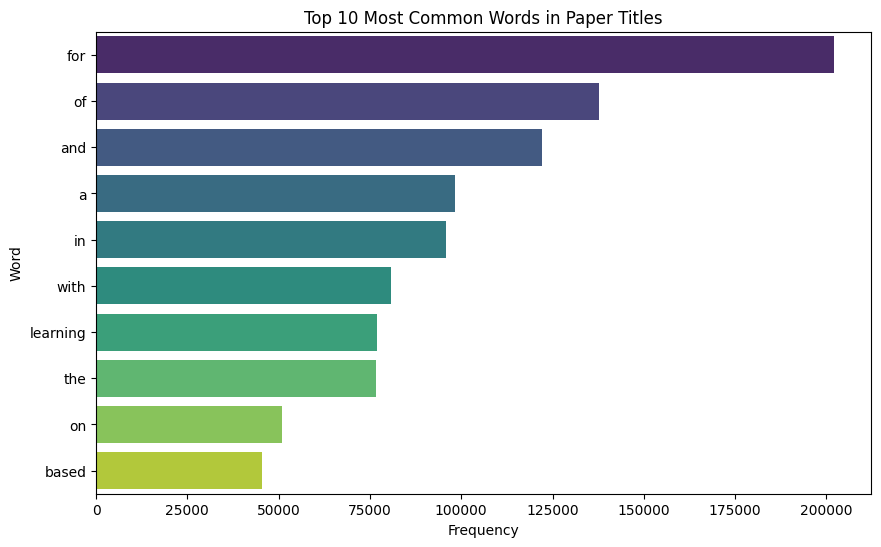

In [11]:
# Plot top words
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for word, count in top_words], y=[word for word, count in top_words], palette='viridis')
plt.title('Top 10 Most Common Words in Paper Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [12]:
# 5. Papers Containing "Machine Learning"
ml_papers = papers_df[papers_df['contains_ml'] == 1]
print(f"\nNumber of papers containing 'machine learning': {len(ml_papers)}")



Number of papers containing 'machine learning': 5784


/tmp/ipykernel_42655/35065978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=ml_papers, palette='magma')


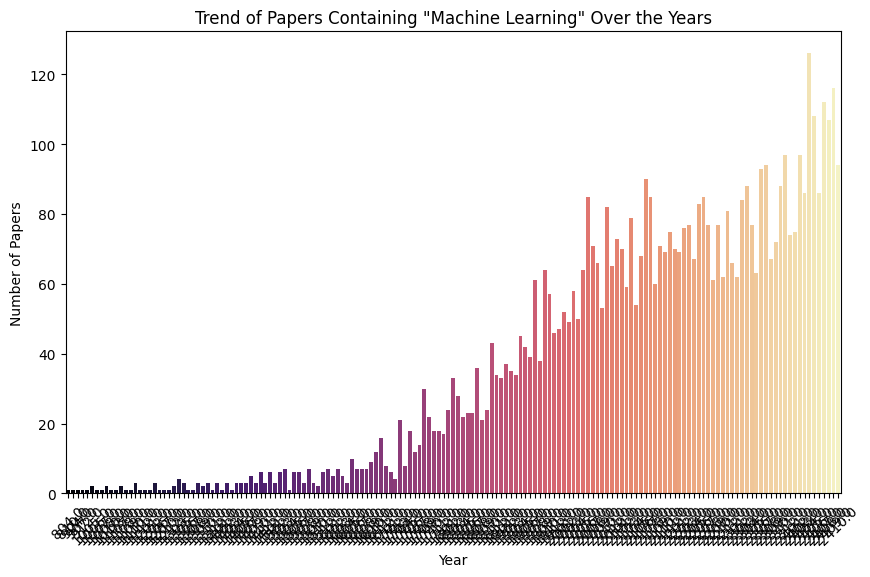

In [13]:
# Plot the trend of "machine learning" papers over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=ml_papers, palette='magma')
plt.title('Trend of Papers Containing "Machine Learning" Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()

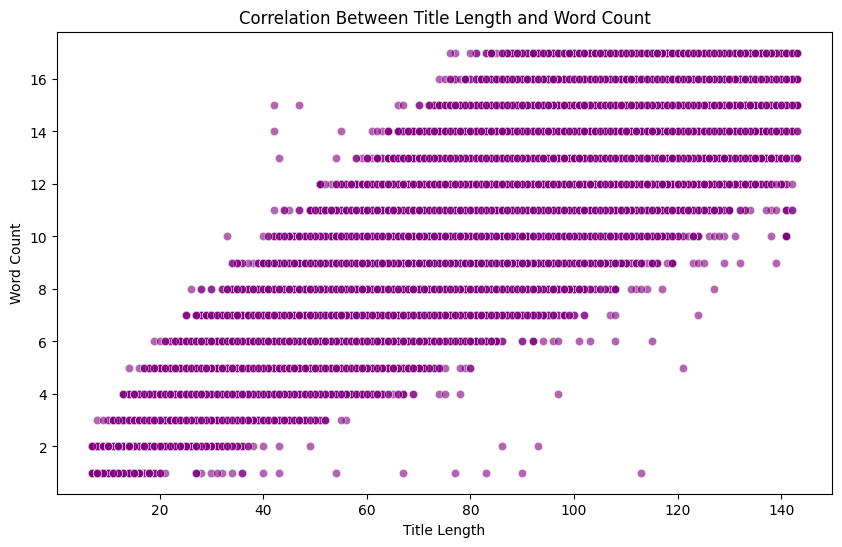

In [14]:
# 6. Correlation Between Title Length and Word Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_length', y='word_count', data=papers_df, alpha=0.6, color='purple')
plt.title('Correlation Between Title Length and Word Count')
plt.xlabel('Title Length')
plt.ylabel('Word Count')
plt.show()

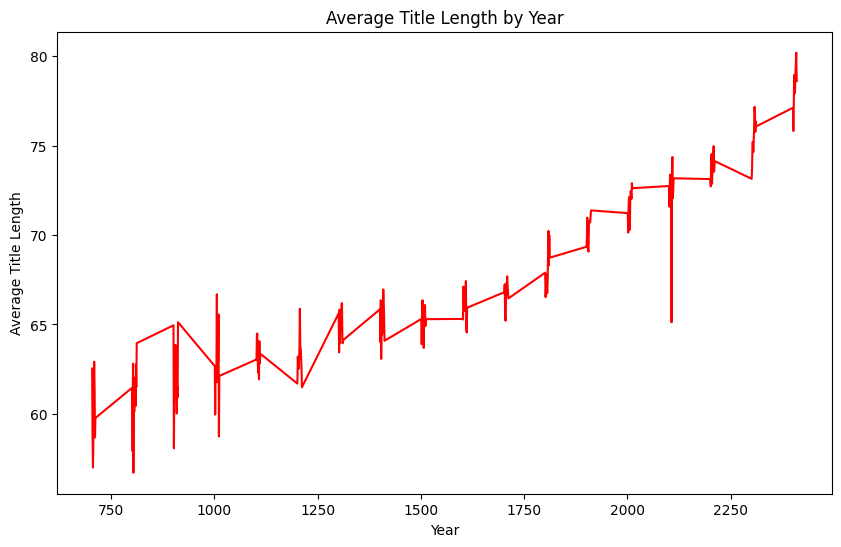

In [15]:
# 7. Average Title Length by Year
avg_title_length_by_year = papers_df.groupby('year')['title_length'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='title_length', data=avg_title_length_by_year, color='red')
plt.title('Average Title Length by Year')
plt.xlabel('Year')
plt.ylabel('Average Title Length')
plt.show()

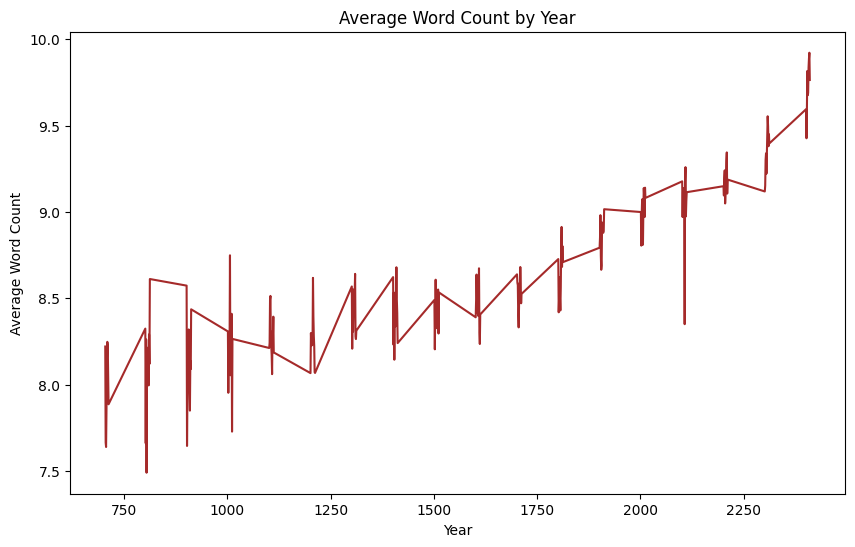

In [16]:
# 8. Average Word Count by Year
avg_word_count_by_year = papers_df.groupby('year')['word_count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='word_count', data=avg_word_count_by_year, color='brown')
plt.title('Average Word Count by Year')
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.show()

/tmp/ipykernel_42655/3892064219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=papers_df, palette='coolwarm')


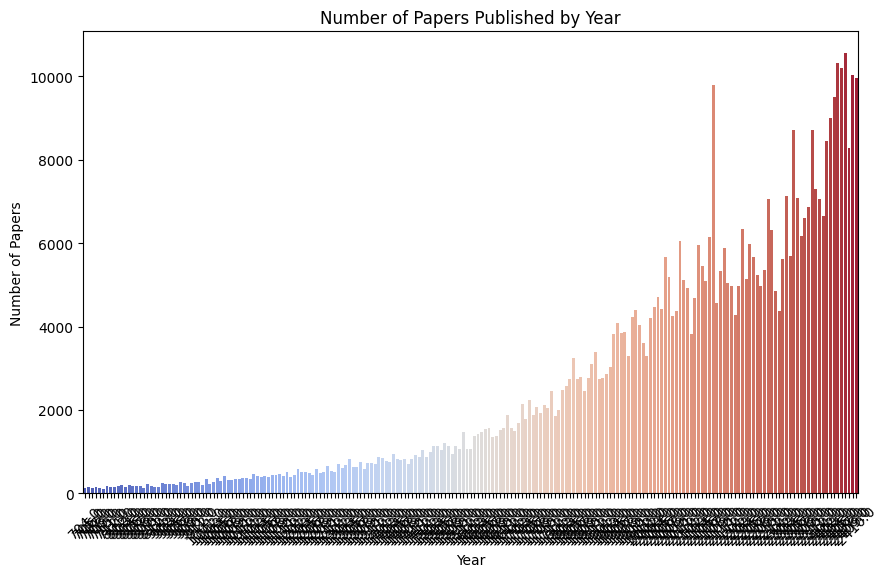

In [17]:
# 9. Papers by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=papers_df, palette='coolwarm')
plt.title('Number of Papers Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Save top words to a CSV file
top_words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])
top_words_df.to_csv(PROCESSED_DIR / 'top_words.csv', index=False)

# Save average title length by year
avg_title_length_by_year.to_csv(PROCESSED_DIR / 'avg_title_length_by_year.csv', index=False)

# Save average word count by year
avg_word_count_by_year.to_csv(PROCESSED_DIR / 'avg_word_count_by_year.csv', index=False)

print("\nExploratory Data Analysis completed and insights saved to 'processed' directory.")



Exploratory Data Analysis completed and insights saved to 'processed' directory.
